### DATA 전처리
- 결측치 분석 및 처리
- 이상치 분석 및 처리

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import numpy

train_path = "../data/origin/train.csv"
building_path = "../data/origin/building_info.csv"
train = pd.read_csv(train_path, encoding='utf-8')
building = pd.read_csv(building_path, encoding='utf-8')
print("train_columns: ",list(train.columns))
print("building_info_columns: ",list(building.columns))

train_columns:  ['num_date_time', '건물번호', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)']
building_info_columns:  ['건물번호', '건물유형', '연면적(m2)', '냉방면적(m2)', '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']


In [4]:
ko2en_dict = {
 '건물번호': 'b_num',
 '일시': 'date',
 '기온(°C)': 'tmp',
 '강수량(mm)': 'rain',
 '풍속(m/s)': 'wind',
 '습도(%)': 'hum',
 '일조(hr)': 'sunshine',
 '일사(MJ/m2)': 'solar',
 '전력소비량(kWh)': 'power_consumption',
 '건물유형': 'b_type',
 '연면적(m2)': 'total_area',
 '냉방면적(m2)': 'cooling_area',
 '태양광용량(kW)': 'solar_capacity',
 'ESS저장용량(kWh)': 'ess_capacity',
 'PCS용량(kW)': 'pcs_capacity',
}

def rename_dataframe_columns(df, mapping_dict):
    return df.rename(columns=mapping_dict).copy()

train_df = rename_dataframe_columns(train, ko2en_dict)
train_df['month'] = train_df['date'].apply(lambda x : int(x[4:6]))
train_df['day'] = train_df['date'].apply(lambda x : int(x[6:8]))
train_df['time'] = train_df['date'].apply(lambda x : int(x[9:11]))
train_df = train_df.drop("date", axis=1)
building_info_df = rename_dataframe_columns(building, ko2en_dict)

train_df = pd.merge(train_df, building_info_df, on='b_num', how='left')
train_df.to_csv("../data/merge_train.csv",index=False, encoding='utf-8')
display(train_df.iloc[::30])
print("train_columns: ",list(train_df.columns))

num_date_time  b_num   tmp  rain  wind   hum  sunshine  solar  \
0         1_20240601 00      1  18.3   0.0   2.6  82.0       0.0   0.00   
30        1_20240602 06      1  15.7   0.0   1.7  70.0       0.1   0.05   
60        1_20240603 12      1  25.4   0.0   2.6  35.0       1.0   3.63   
90        1_20240604 18      1  27.7   0.0   3.5  36.0       1.0   1.38   
120       1_20240606 00      1  21.1   0.0   1.7  65.0       0.0   0.00   
...                 ...    ...   ...   ...   ...   ...       ...    ...   
203850  100_20240818 18    100  29.8   0.0   2.8  66.0       0.8   0.80   
203880  100_20240820 00    100  28.9   0.0   3.3  82.0       0.0   0.00   
203910  100_20240821 06    100  26.5   0.7   6.0  93.0       0.0   0.00   
203940  100_20240822 12    100  30.7   0.0   6.3  74.0       0.7   2.46   
203970  100_20240823 18    100  30.4   0.0   3.3  71.0       1.0   0.91   

        power_consumption  month  day  time b_type  total_area  cooling_area  \
0                 5794.80      6    1     0     호텔    82912.71       77586.0   
30                4505.67      6    2     6     호텔    82912.71       77586.0   
60                4666.05      6    3    12     호텔    82912.71       77586.0   
90                5573.61      6    4    18     호텔    82912.71       77586.0   
120               4192.41      6    6     0     호텔    82912.71       77586.0   
...                   ...    ...  ...   ...    ...         ...           ...   
203850            2442.48      8   18    18     호텔   162070.24      152943.0   
203880            2117.64      8   20     0     호텔   162070.24      152943.0   
203910            2453.76      8   21     6     호텔   162070.24      152943.0   
203940            1292.04      8   22    12     호텔   162070.24      152943.0   
203970            2767.08      8   23    18     호텔   162070.24      152943.0   

       solar_capacity ess_capacity pcs_capacity  
0                   -            -            -  
30                  -            -            -  
60                  -            -            -  
90                  -            -            -  
120                 -            -            -  
...               ...          ...          ...  
203850              -            -            -  
203880              -            -            -  
203910              -            -            -  
203940              -            -            -  
203970              -            -            -  

[6800 rows x 18 columns]

train_columns:  ['num_date_time', 'b_num', 'tmp', 'rain', 'wind', 'hum', 'sunshine', 'solar', 'power_consumption', 'month', 'day', 'time', 'b_type', 'total_area', 'cooling_area', 'solar_capacity', 'ess_capacity', 'pcs_capacity']


### 상관계수(전력사용량) 파악
- rain 컬럼 제거 예정

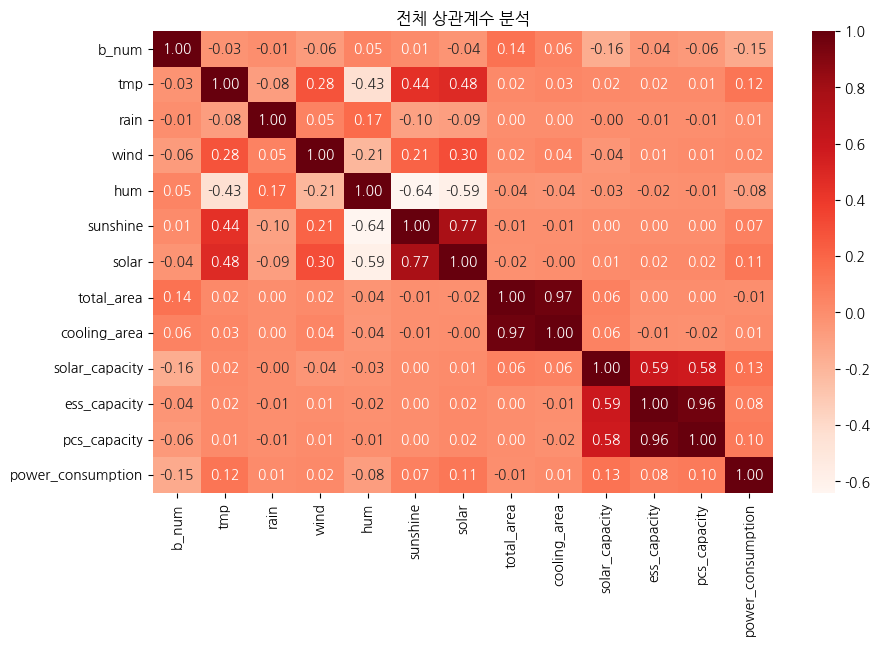

In [95]:
# 전체 상관계수 파악
def make_corr(cols, df):
    result = df[cols].replace("-", 0)
    corr = result.corr()
    return corr

total_corr_list = ['b_num', 'tmp', 'rain', 'wind', 'hum', 'sunshine', 'solar', 'total_area', 'cooling_area', 'solar_capacity', 'ess_capacity', 'pcs_capacity', 'power_consumption']
total_corr = make_corr(total_corr_list, train_df)
plt.figure(figsize=(10,6))
plt.title("전체 상관계수 분석")
sns.heatmap(total_corr, annot=True, cmap='Reds', fmt=".2f")
plt.show()

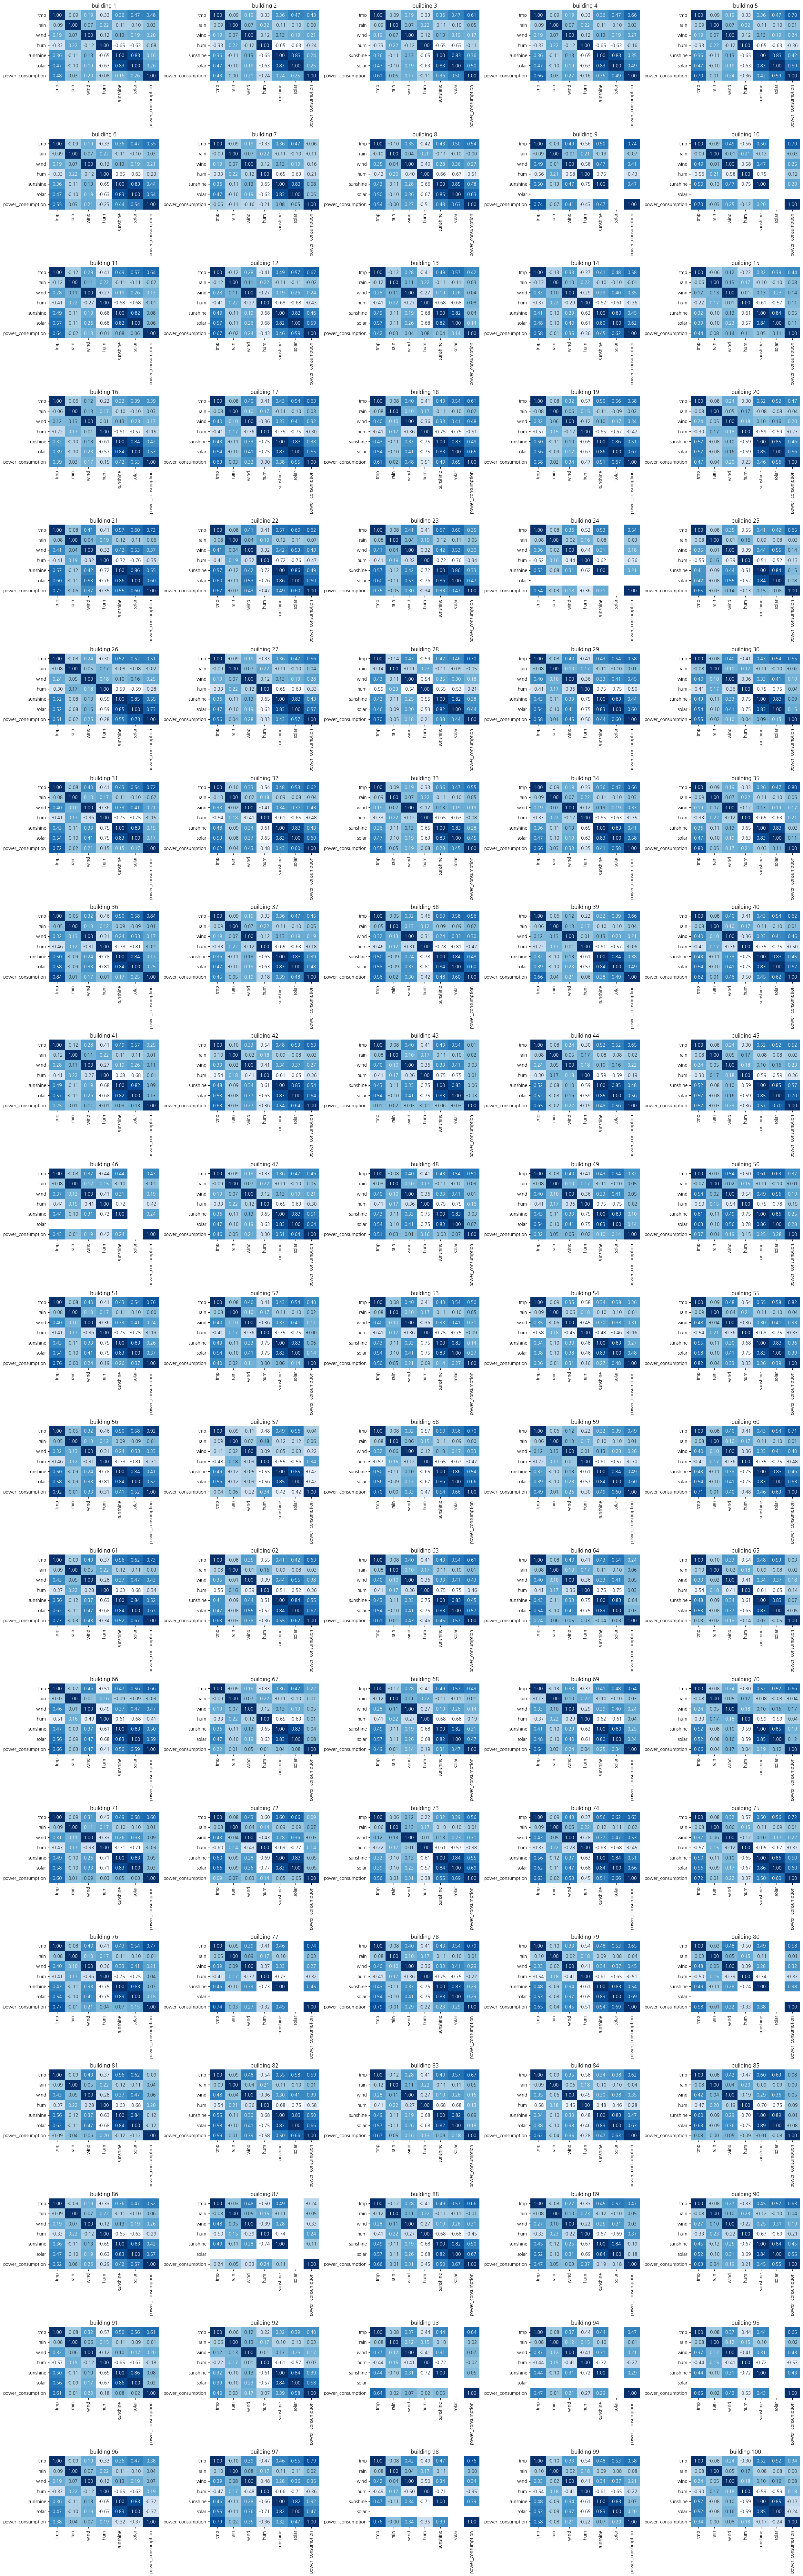

[Power Consumption 순위]
tmp: 0.5422
sunshine: 0.3121
hum: 0.2522
wind: 0.2389
rain: 0.0285
solar: nan


In [96]:
# 건물별 상관계수 파악
corr_list = ['tmp', 'rain', 'wind', 'hum', 'sunshine', 'solar','power_consumption']

sum_corr = {col: 0 for col in corr_list if col != 'power_consumption'}

fig, axes = plt.subplots(20, 5, figsize=(25, 80))  
axes = axes.flatten()

for i in range(1, 101):
    building_num = train_df[train_df['b_num'] == i]
    corr = make_corr(corr_list, building_num)
    
    ax = axes[i-1]
    sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", ax=ax, cbar=False)
    ax.set_title(f"building {i}")
    
    for col in sum_corr.keys():
        sum_corr[col] += abs(corr.loc['power_consumption', col])

plt.tight_layout()
plt.show()

# 평균 상관계수 계산 및 정렬 출력
avg_corr = {col: sum_corr[col]/100 for col in sum_corr.keys()}
sorted_corr = sorted(avg_corr.items(), key=lambda x: x[1], reverse=True)

print("[Power Consumption 순위]")
for col, val in sorted_corr:
    print(f"{col}: {val:.4f}")

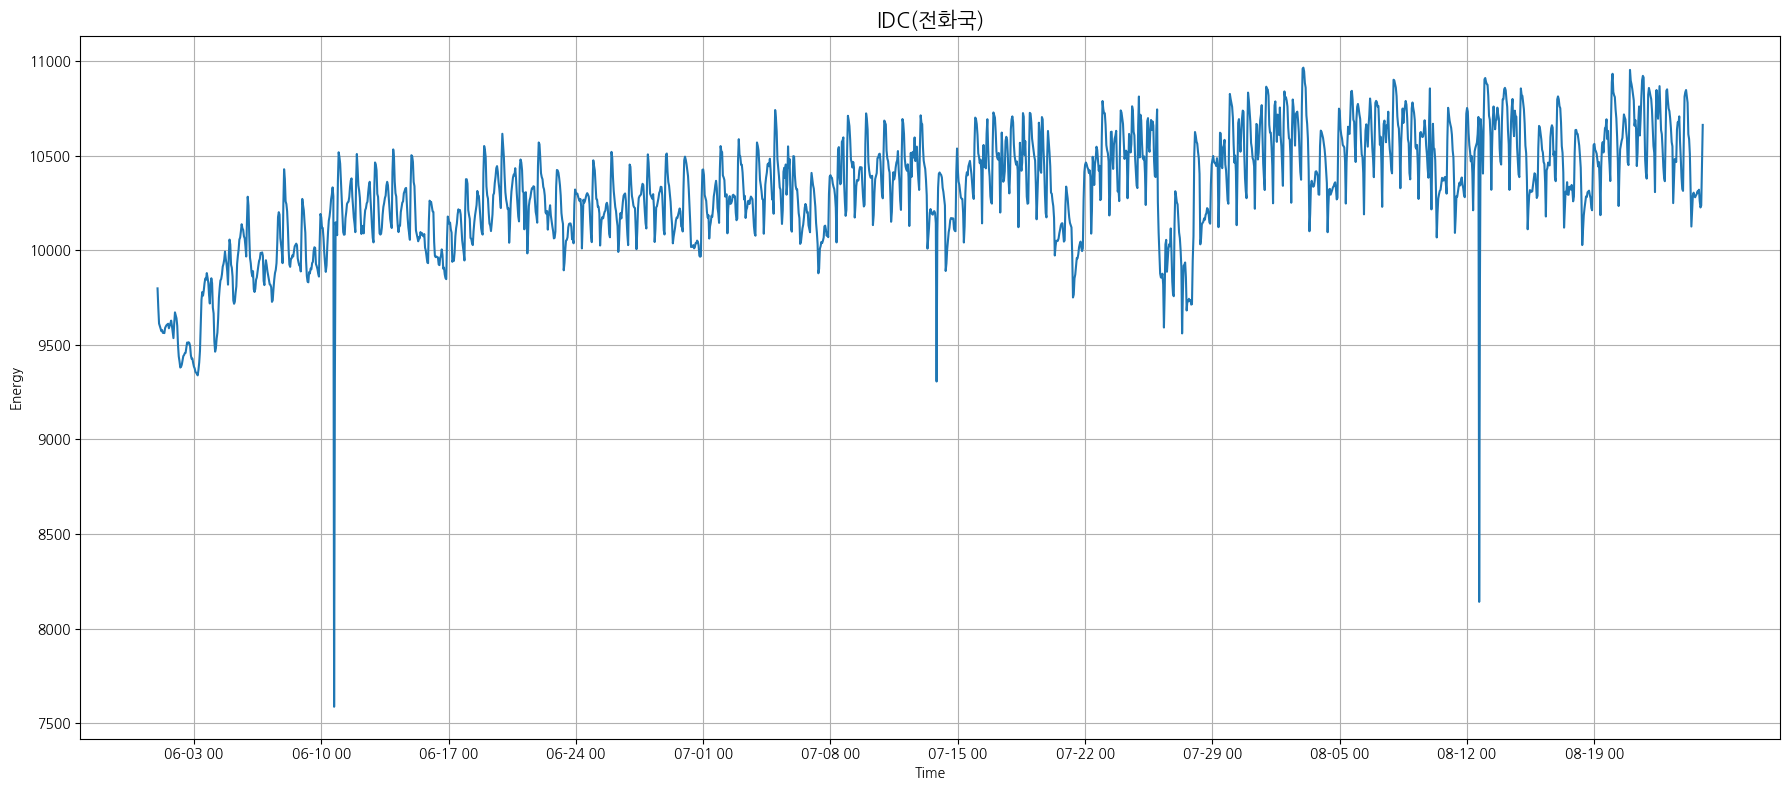

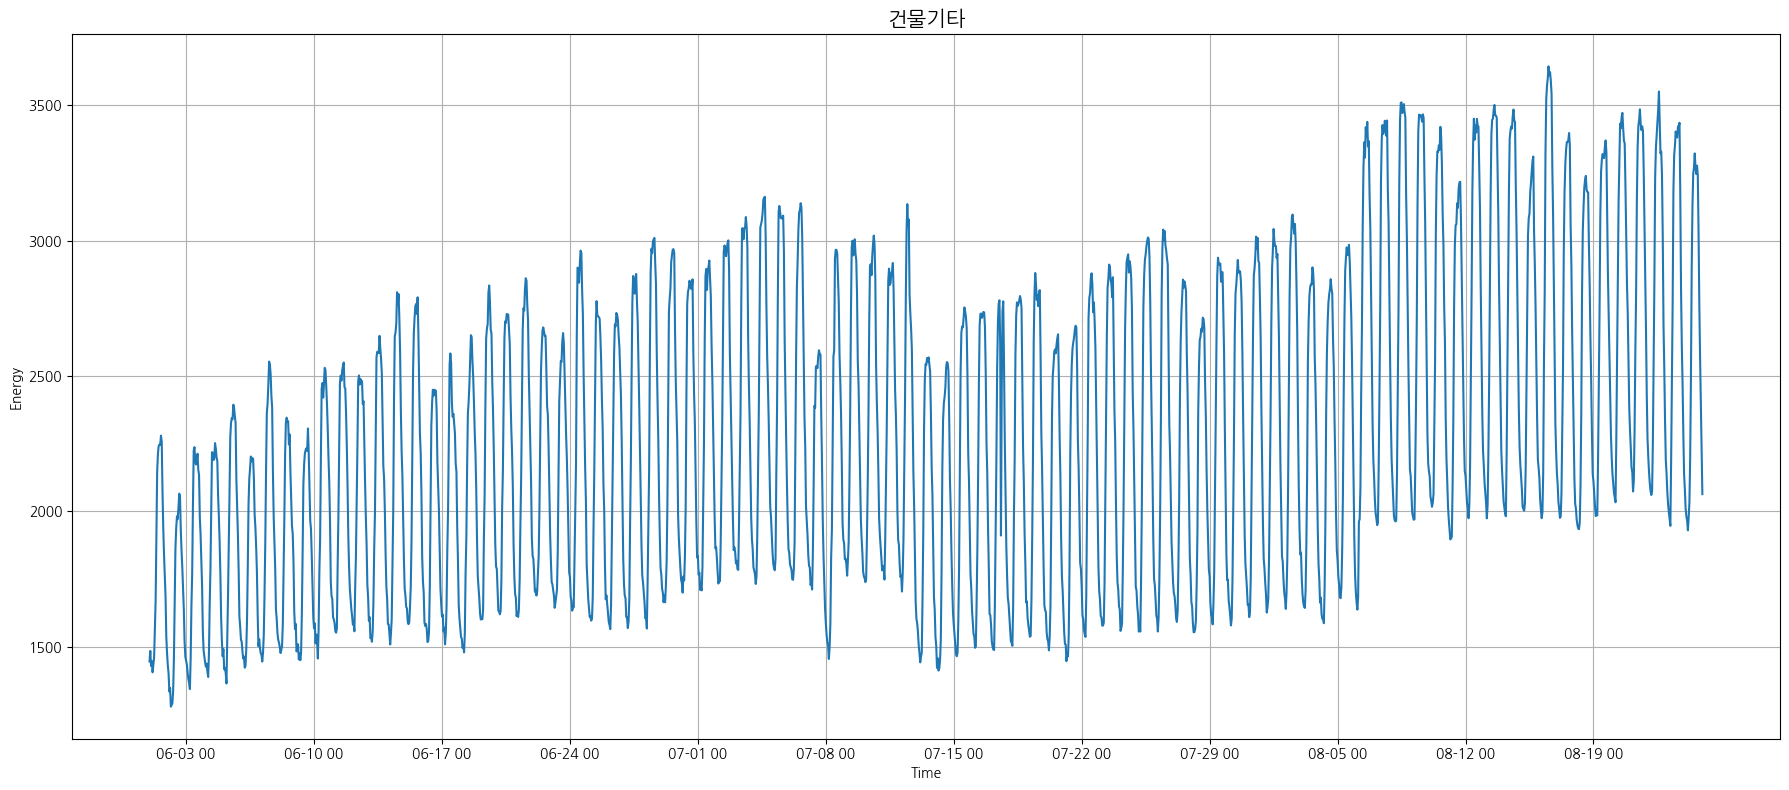

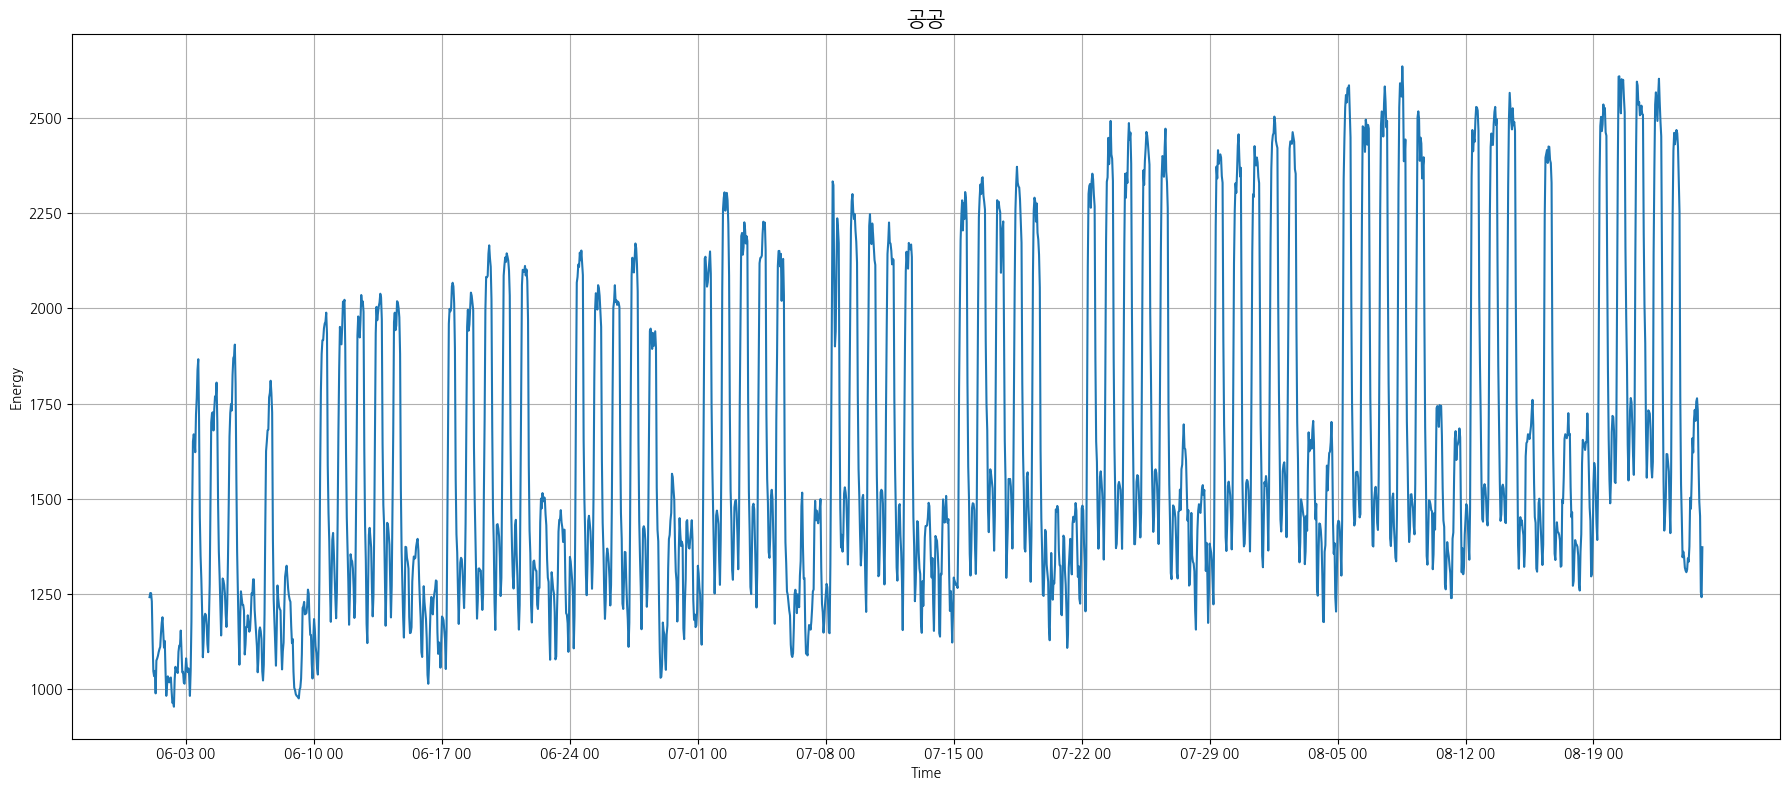

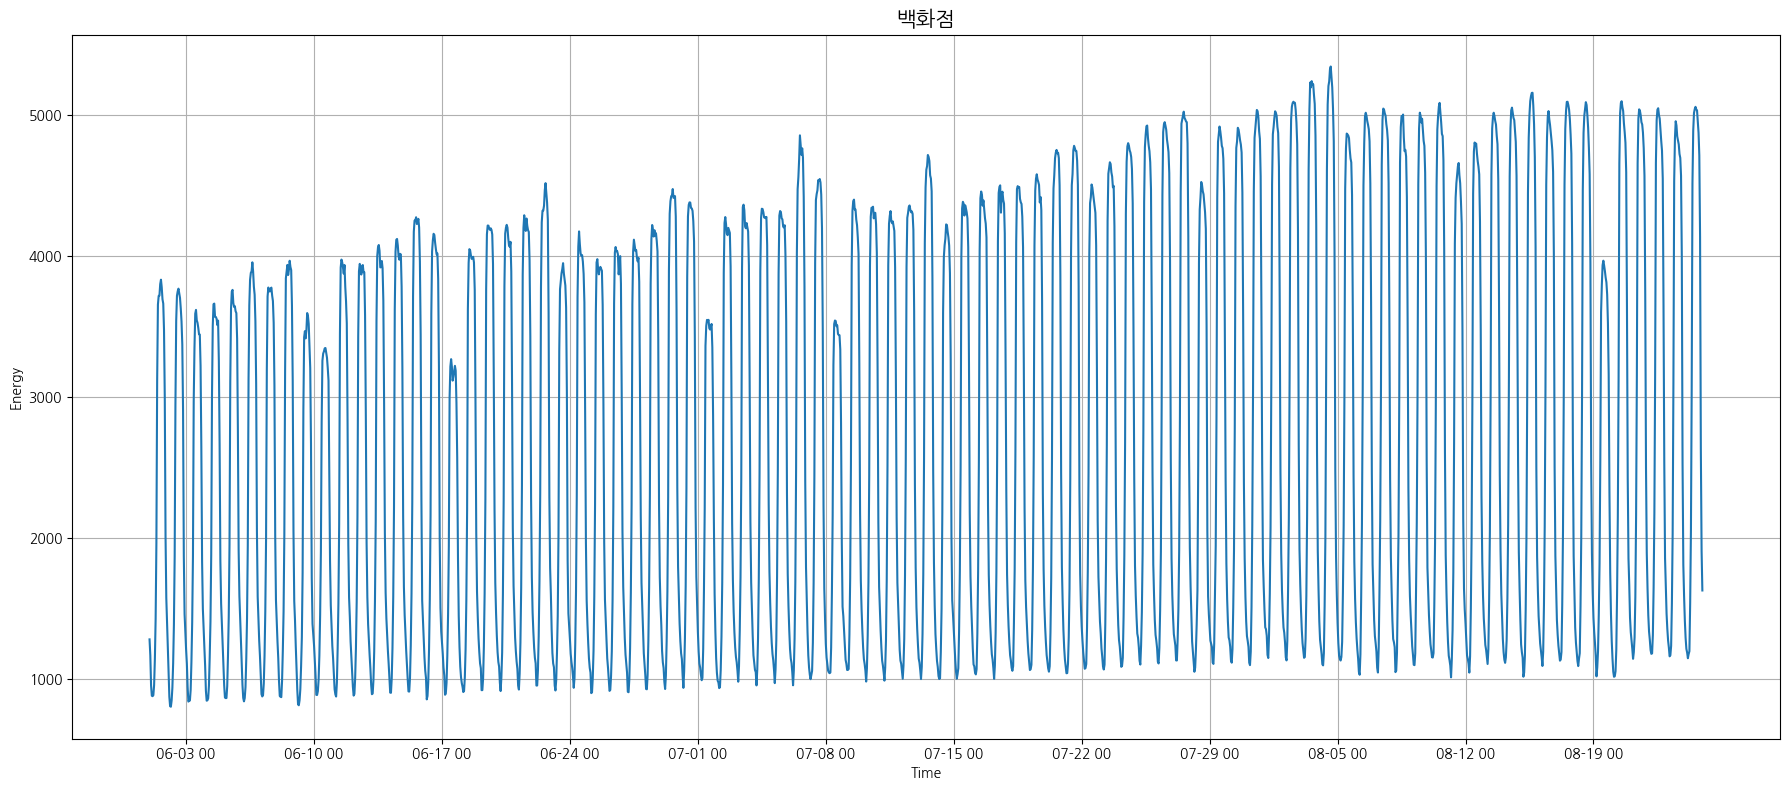

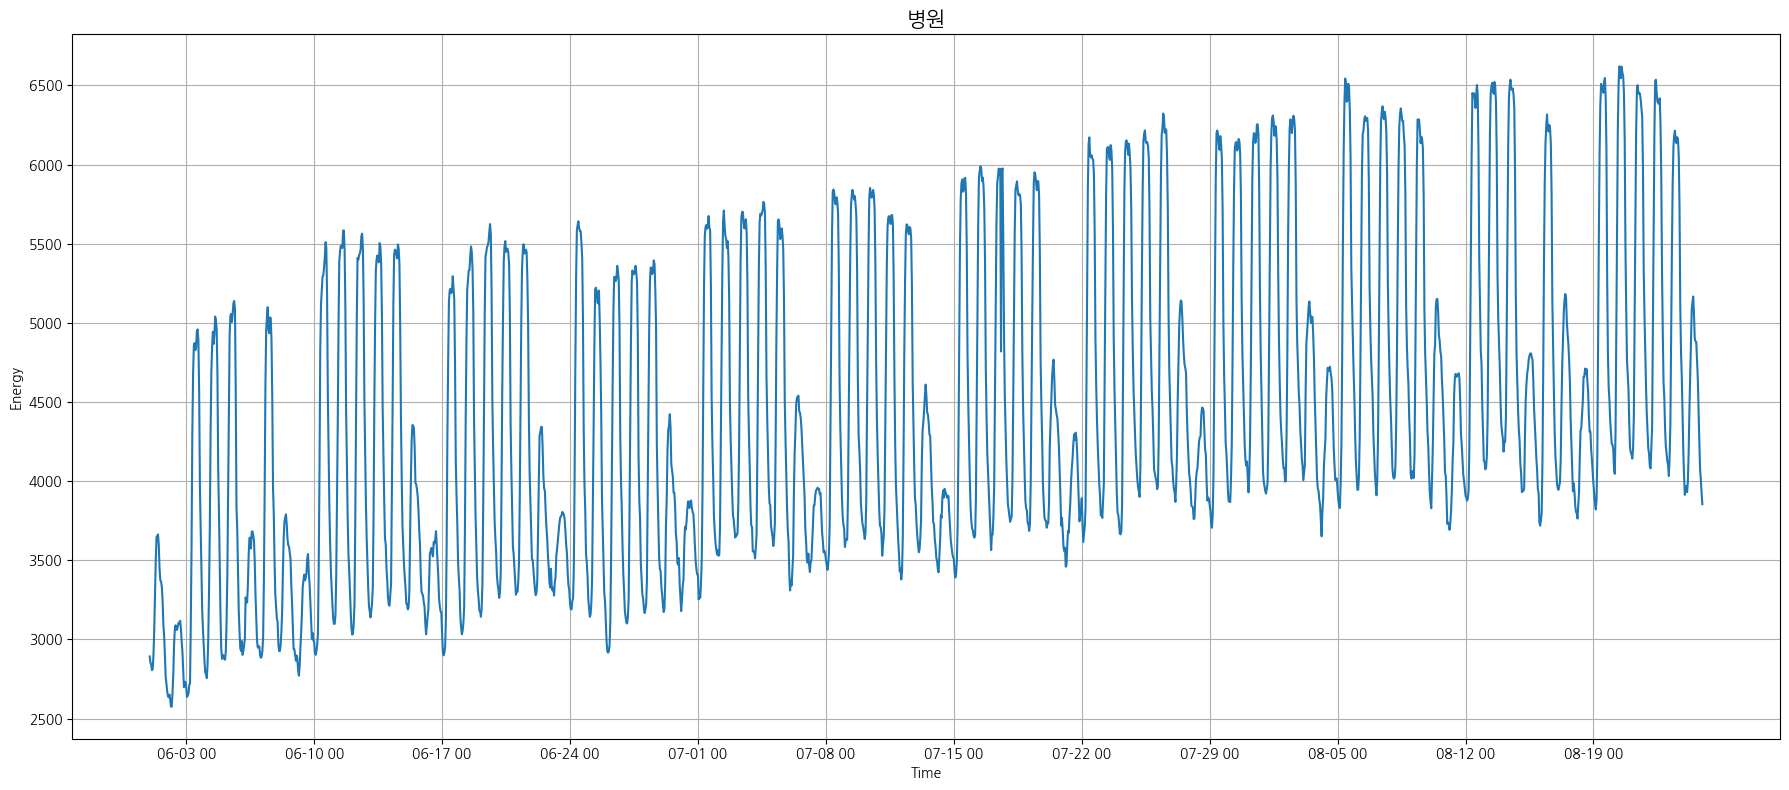

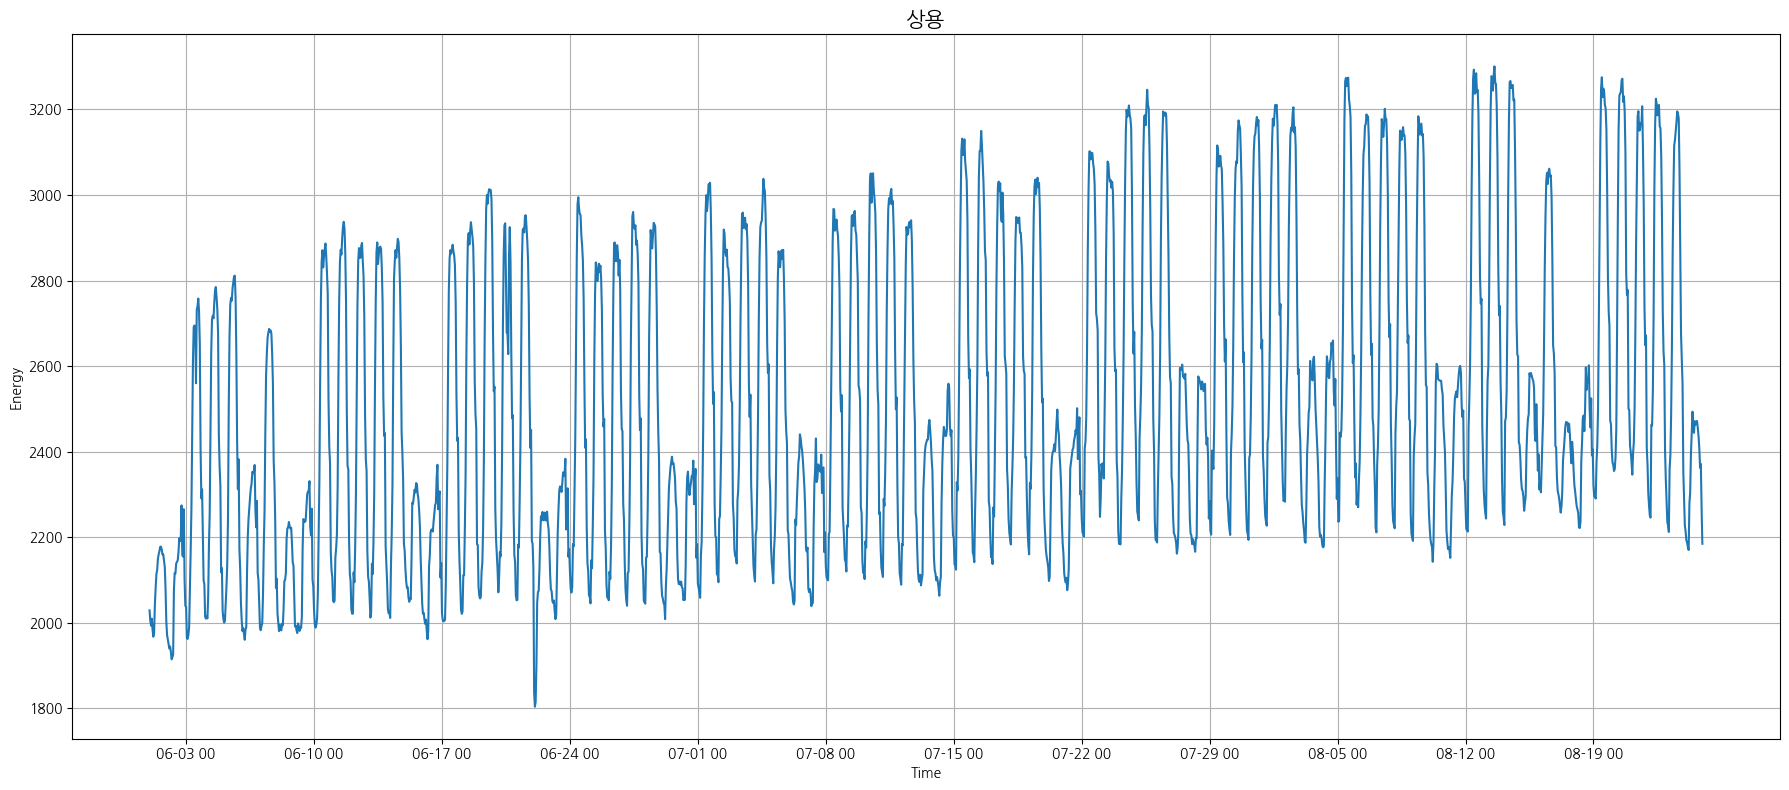

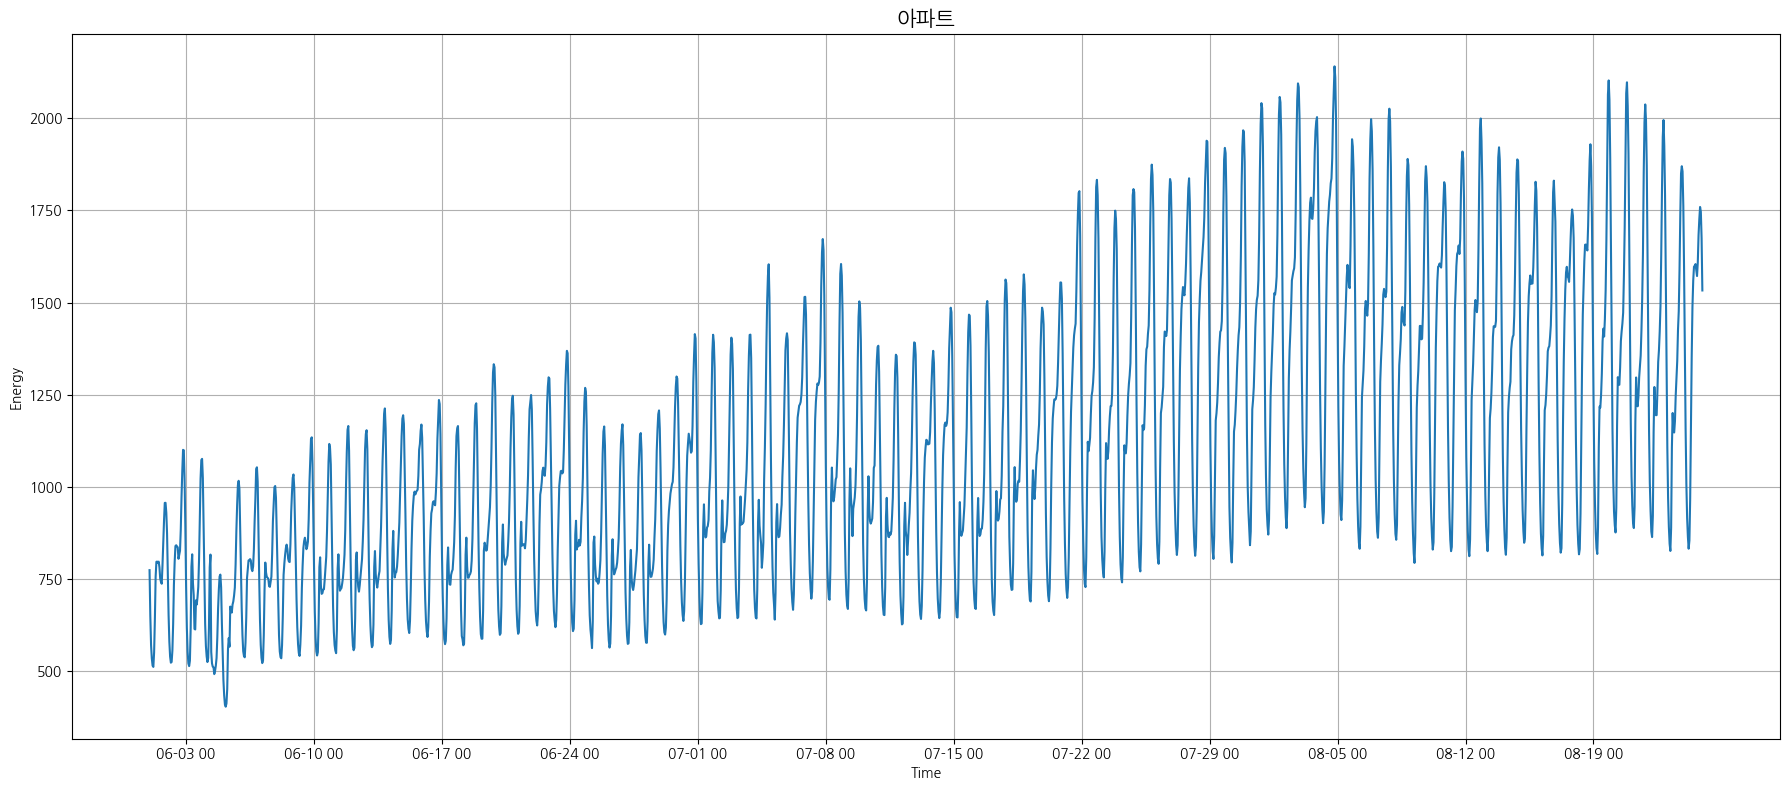

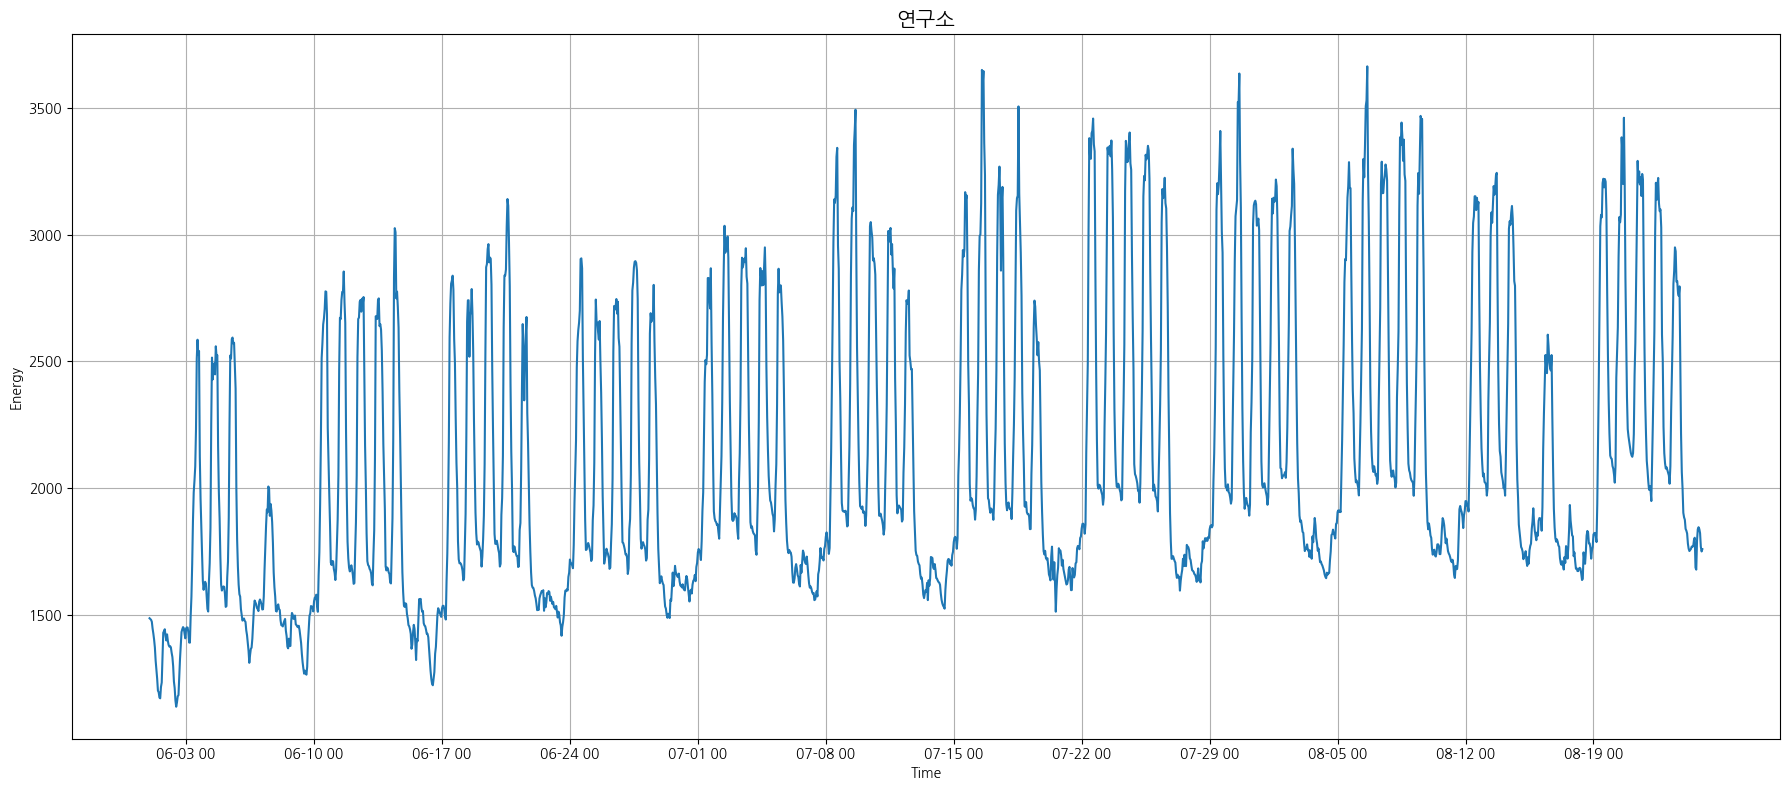

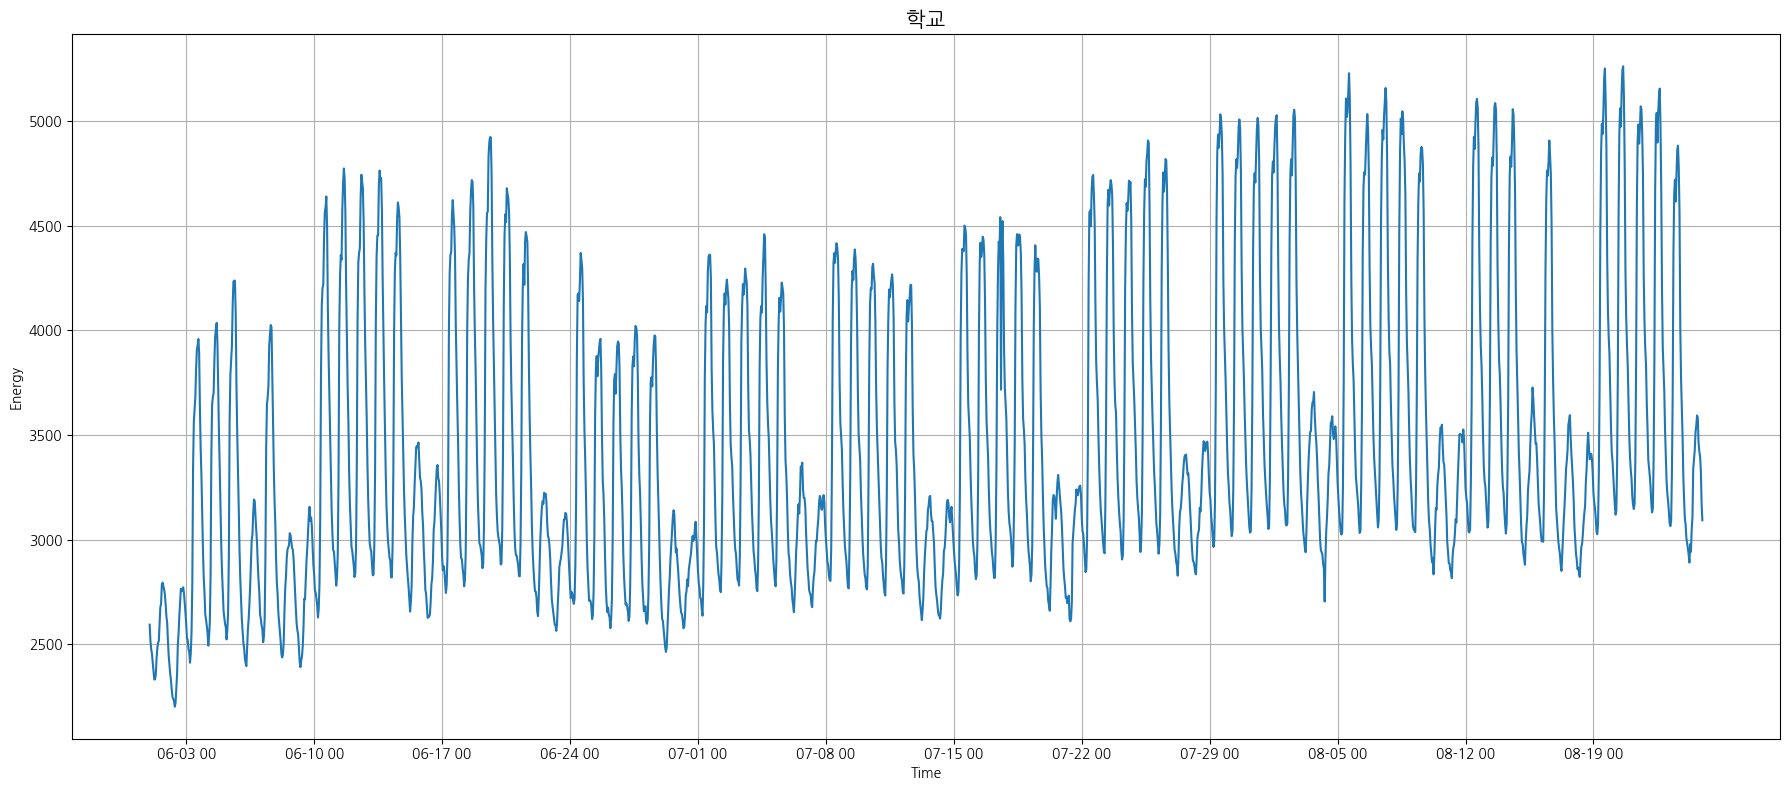

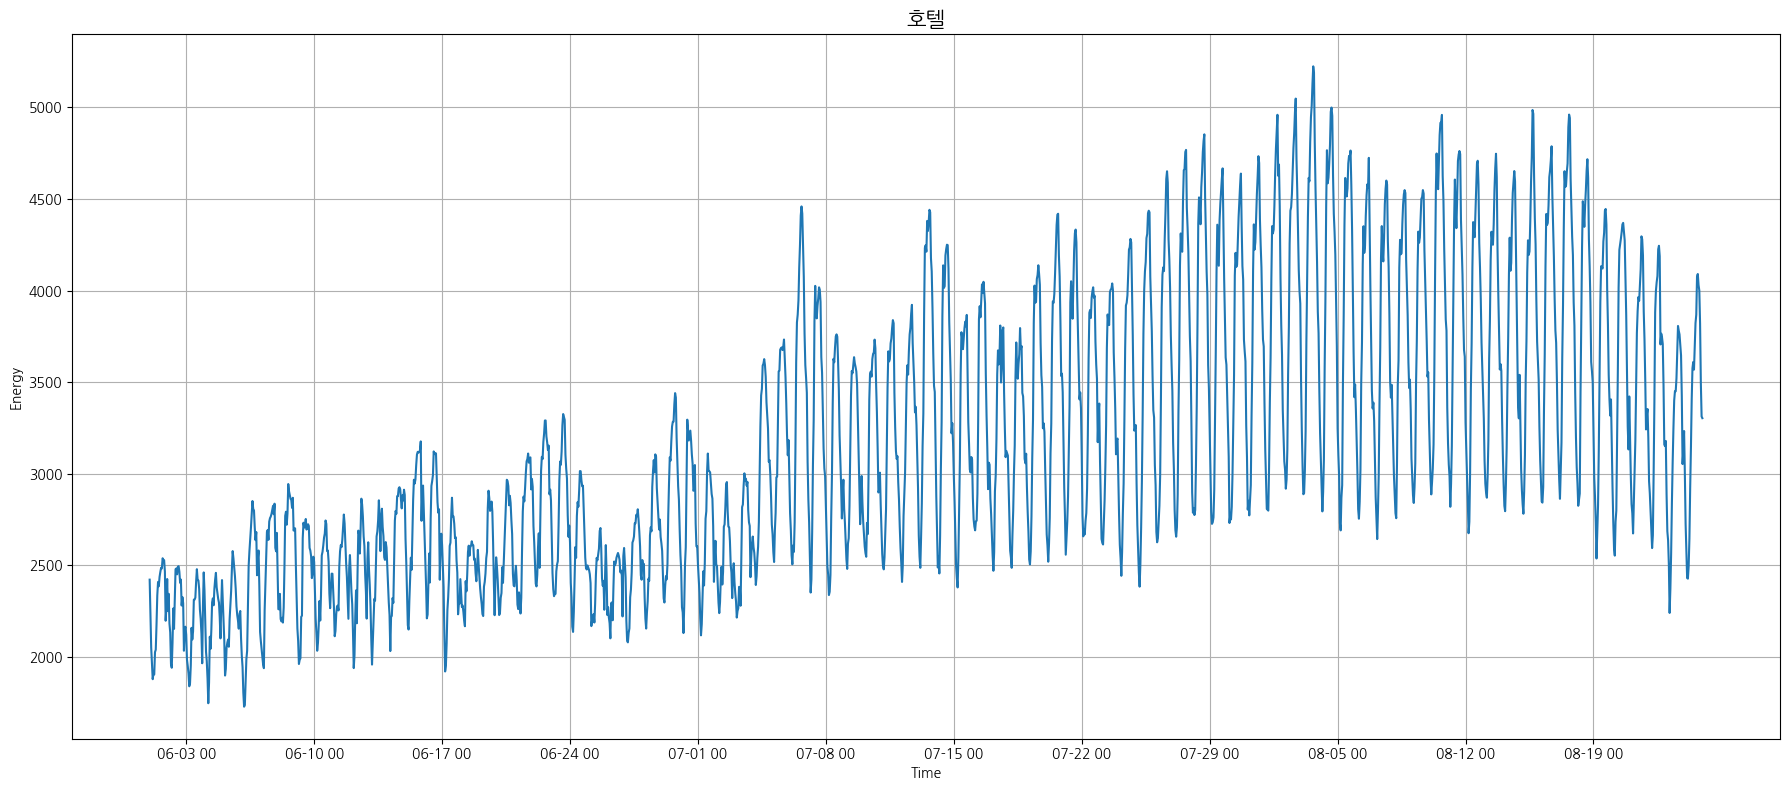

In [114]:
# 건물 타입별 전력시용량 추세 확인
train_df['datetime'] = (
    train_df['month'].astype(str).str.zfill(2) + '-' +
    train_df['day'].astype(str).str.zfill(2) + ' ' +
    train_df['time'].astype(str).str.zfill(2)
)

# b_type, datetime별 평균 전력 소비량 계산
time_power = train_df.groupby(['b_type', 'datetime'])['power_consumption'].mean().reset_index()

for b_type in sorted(train_df['b_type'].unique()):
    data = time_power[time_power['b_type'] == b_type].reset_index(drop=True)

    plt.figure(figsize=(18,8)) 
    plt.plot(range(len(data)), data['power_consumption'], label=f'b_type {b_type}')
    
    plt.xticks(range(48, len(data), 168),
               data['datetime'].iloc[48::168],
               rotation=0, fontsize=10)
    plt.yticks(fontsize=10)

    plt.title(b_type, fontsize=15)
    plt.xlabel('Time', fontsize=10)
    plt.ylabel('Energy', fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
